<a href="https://colab.research.google.com/github/arka19das/ML/blob/master/TensorflowVariousConv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
mnist=tf.keras.datasets.fashion_mnist
(training_image,training_labels),(test_image,test_labels)=mnist.load_data()


In [0]:
#callback implementation
class My_call_back(tf.keras.callbacks.Callback):
  def on_my_epochs(self,epochs,logs={}):
      if(logs.get['accuracy']>0.87):
        print("accuracy more than 87 %")
        

callback=My_call_back()##callback not working


In [0]:

training_image=training_image.reshape(60000,28,28,1)
test_image=test_image.reshape(10000,28,28,1)

training_image=training_image/255
test_image=test_image/255

model=tf.keras.models.Sequential([
                           tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
                           tf.keras.layers.MaxPooling2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(units=128,activation='relu'),
                           tf.keras.layers.Dense(units=10,activation='softmax')])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()
model.fit(training_image,training_labels,epochs=10,callbacks=[callback])# calling the callback

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [0]:
model.evaluate(test_image,test_labels)
print(test_labels[:100])

313/313 [==============================] - 1s 3ms/step - loss: 0.2868 - accuracy: 0.9142
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


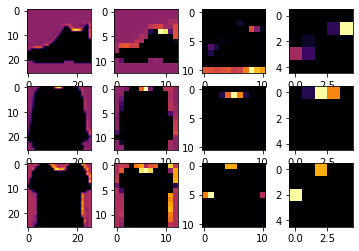

In [0]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=8787
THIRD_IMAGE=1000
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_image[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_image[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_image[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)